In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Path to your dataset
dataset_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset'

Mounted at /content/drive


# Step 1: Read and Display Original Images


## Preprocessing and Augmentation

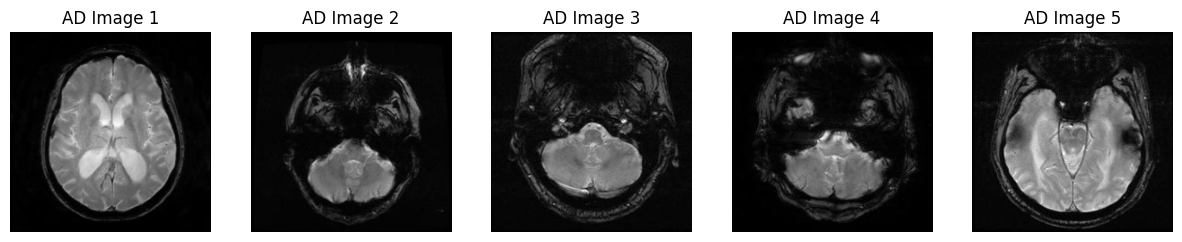

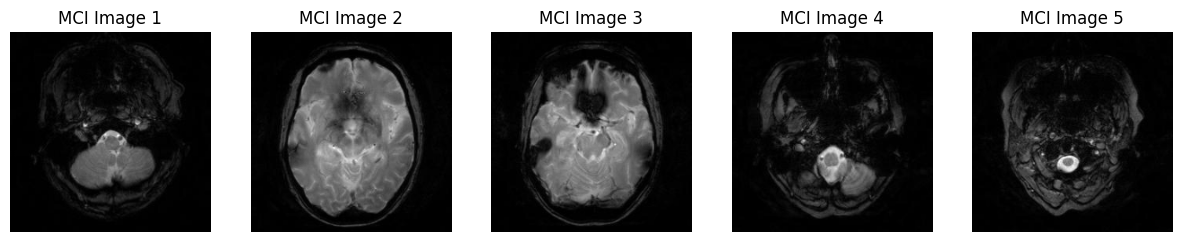

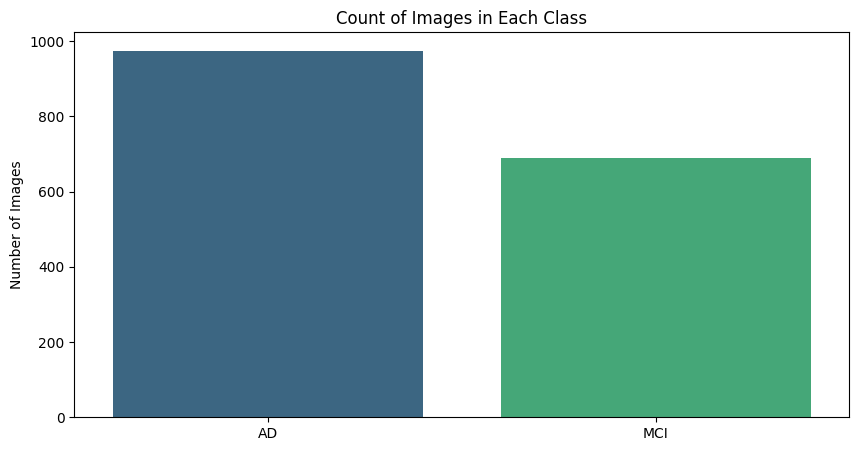

AD images count: 975
MCI images count: 689
Classes are correct and contain images.


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size = 224

# Function to load and preprocess image
def load_and_preprocess_image(image_path, grayscale=False):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
    if img is None:
        print(f"Error loading image: {image_path}")
        return None
    if not grayscale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format
    img = cv2.resize(img, (img_size, img_size))  # Resize the image to a specified size
    img = img.astype('float32') / 255.0  # Normalize the pixel values to the range [0, 1]
    return img

# Function to display images
def display_images(image_paths, title, grayscale=False):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img = load_and_preprocess_image(img_path, grayscale)
        if img is not None:
            plt.subplot(1, 5, i + 1)
            if grayscale:
                plt.imshow(img, cmap='gray')
            else:
                plt.imshow(img)
            plt.title(f"{title} Image {i + 1}")
            plt.axis('off')
    plt.show()

# Display some AD images
display_images(ad_images, "AD", grayscale=True)

# Display some MCI images
display_images(mci_images, "MCI", grayscale=True)

# Draw count plot of each class
ad_count = len(ad_images)
mci_count = len(mci_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count],hue=['AD', 'MCI'], palette='viridis')
plt.title('Count of Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_images, mci_images)

## Preprocess the data like an article

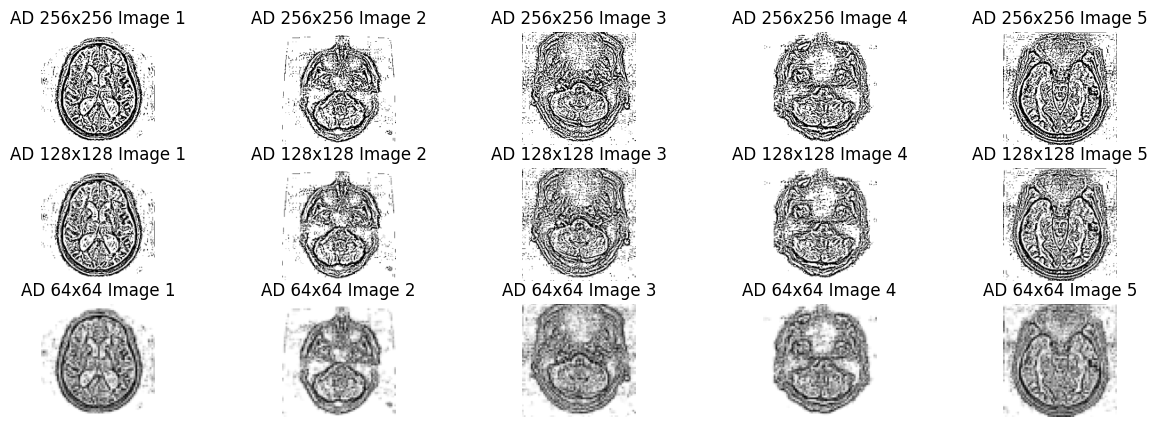

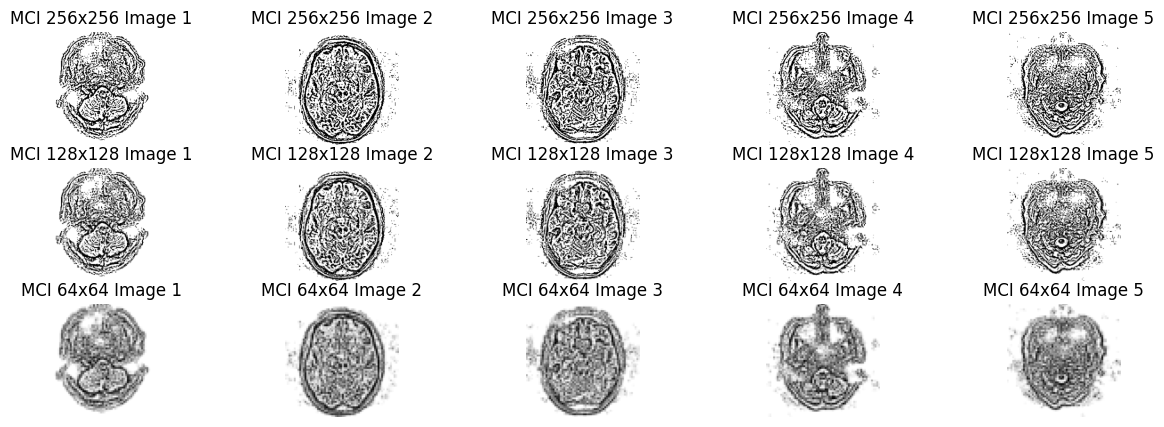

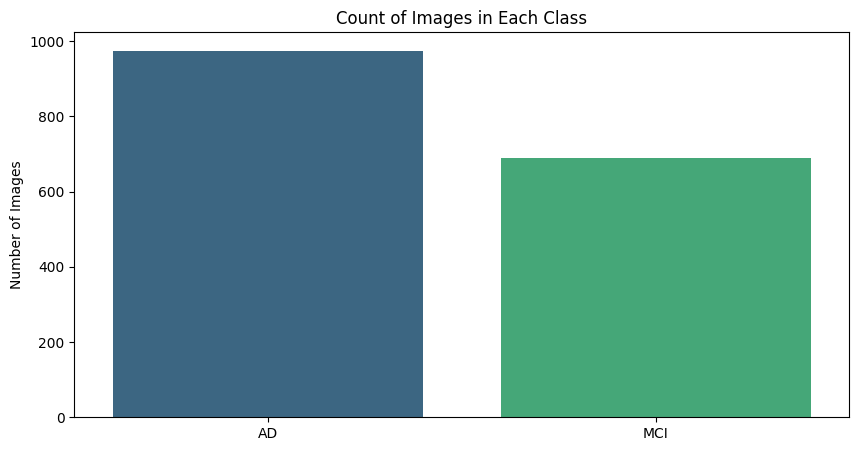

AD images count: 975
MCI images count: 689
Classes are correct and contain images.


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize

# Paths to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size_256 = (256, 256)
img_size_128 = (128, 128)
img_size_64 = (64, 64)

# Function to load, preprocess, and transform image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if img is None:
        print(f"Error loading image: {image_path}")
        return None

    # Adaptive thresholding
    img_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Crop and filter (for simplicity, we'll just resize to 256x256)
    img_resized = cv2.resize(img_thresh, img_size_256)

    # Resizing using skimage transformer
    img_128 = resize(img_resized, img_size_128, anti_aliasing=True)
    img_64 = resize(img_resized, img_size_64, anti_aliasing=True)

    return img_resized, img_128, img_64

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img_256, img_128, img_64 = load_and_preprocess_image(img_path)
        if img_256 is not None:
            plt.subplot(3, 5, i + 1)
            plt.imshow(img_256, cmap='gray')
            plt.title(f"{title} 256x256 Image {i + 1}")
            plt.axis('off')

            plt.subplot(3, 5, i + 6)
            plt.imshow(img_128, cmap='gray')
            plt.title(f"{title} 128x128 Image {i + 1}")
            plt.axis('off')

            plt.subplot(3, 5, i + 11)
            plt.imshow(img_64, cmap='gray')
            plt.title(f"{title} 64x64 Image {i + 1}")
            plt.axis('off')
    plt.show()

# Display some AD images
display_images(ad_images, "AD")

# Display some MCI images
display_images(mci_images, "MCI")

# Draw count plot of each class
ad_count = len(ad_images)
mci_count = len(mci_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count],hue=['AD','MCI'], palette='viridis')
plt.title('Count of Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_images, mci_images)

# Step 2: Define Augmentation Functions


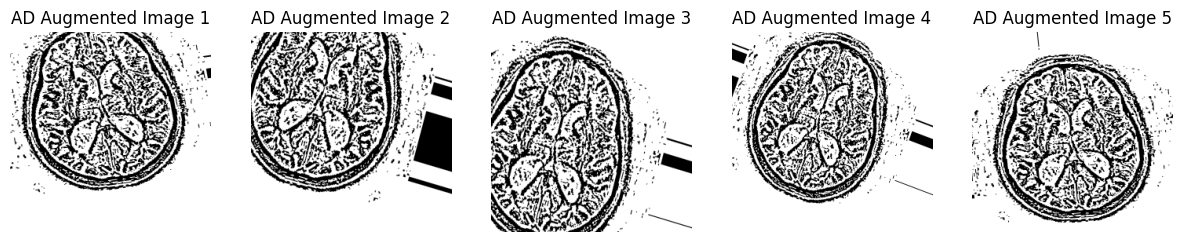

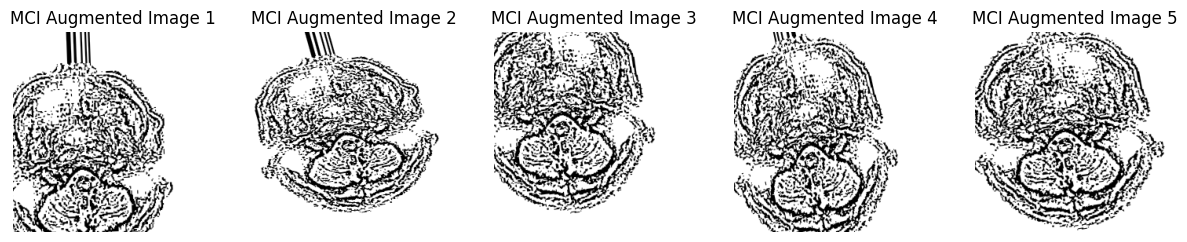

<ipython-input-8-4535d80c8d79>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count], palette='viridis')


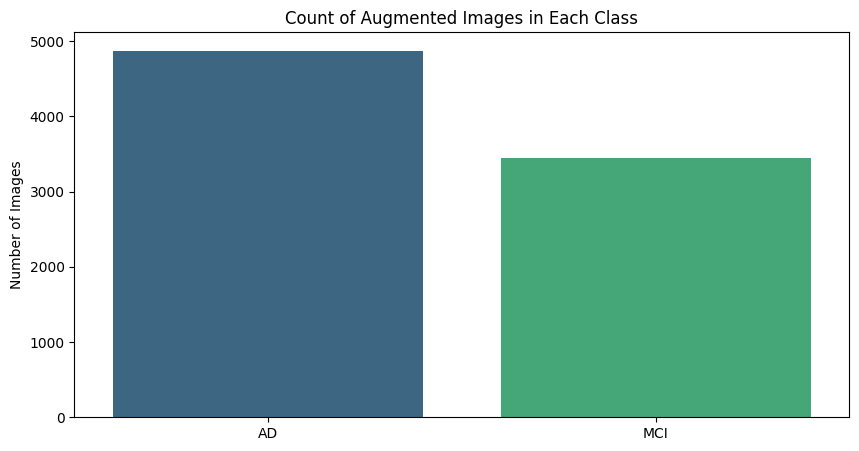

AD images count: 4875
MCI images count: 3445
Classes are correct and contain images.


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from multiprocessing import Pool, cpu_count
from PIL import Image

# Paths to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'
ad_save_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD'
mci_save_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_MCI'

# Create directories to save augmented images if they don't exist
os.makedirs(ad_save_path, exist_ok=True)
os.makedirs(mci_save_path, exist_ok=True)

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory) if image.endswith('.jpg') or image.endswith('.png')]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size_256 = (256, 256)

# Function to load, preprocess, and transform image
def load_and_preprocess_image(image_path):
    try:
        img = Image.open(image_path).convert('L')  # Load as grayscale
        img = np.array(img)

        # Adaptive thresholding
        img_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Resize to 256x256
        img_resized = cv2.resize(img_thresh, img_size_256)

        return img_resized
    except Exception as e:
        print(f"Error loading image: {image_path}, error: {e}")
        return None

# Data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=20,
    zoom_range=0.2
)

# Function to augment and save images in batches
def augment_and_save_images(image_paths, save_dir, total_augmentations, batch_size=32):
    count = 0
    images_needed = total_augmentations * len(image_paths)
    while count < images_needed:
        for image_path in image_paths:
            img = load_and_preprocess_image(image_path)
            if img is not None:
                img = np.expand_dims(img, axis=-1)  # Add channel dimension
                img = np.expand_dims(img, axis=0)   # Add batch dimension
                aug_iter = datagen.flow(img, batch_size=1)
                for _ in range(total_augmentations):
                    aug_img = aug_iter.next()[0].astype('uint8')
                    save_path = os.path.join(save_dir, f"augmented_{count}.png")
                    cv2.imwrite(save_path, aug_img[:, :, 0])
                    count += 1
                    if count >= images_needed:
                        break
            if count >= images_needed:
                break

# Desired number of augmentations (total images should be 5 times the original images)
total_augmentations = 5

# Augment and save AD and MCI images
augment_and_save_images(ad_images, ad_save_path, total_augmentations)
augment_and_save_images(mci_images, mci_save_path, total_augmentations)

# Display some augmented images
def display_augmented_images(image_paths, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{title} Augmented Image {i + 1}")
        plt.axis('off')
    plt.show()

# Get augmented image paths for display
ad_augmented_images = get_image_paths(ad_save_path)
mci_augmented_images = get_image_paths(mci_save_path)
display_augmented_images(ad_augmented_images, "AD")
display_augmented_images(mci_augmented_images, "MCI")

# Draw count plot of each class
ad_count = len(ad_augmented_images)
mci_count = len(mci_augmented_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count], palette='viridis')
plt.title('Count of Augmented Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_augmented_images, mci_augmented_images)
